In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False

matplotlib.rcParams['font.family'] = "Times New Roman"

lw, fs, fc, style = 2, 20, "#f0f0f0", 'seaborn-poster'

import pandas as pd
idx = pd.IndexSlice

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
def value_to_annotate(val):
    if pd.isnull(val):
        return ''
    else:
        return '{:.2f}'.format(val)

In [4]:
source_dict = {'W': 'Weather', 
              'T': 'Twitter', 
              'H': 'HealthMap',
              'F': 'GFT',
              'S': 'GST'}

In [5]:
table1 = pd.read_csv('./table1.tex', sep=r'\s*&\s*', na_values=['N/A'], 
                    engine='python', skiprows=1,
                    converters={'Sources': lambda x: source_dict[x]})
table1.set_index(['Model', 'Sources'], inplace=True)
table1

AR    BO    CL    CR    CO    EC    GF    GT    HN    MX  \
Model Sources                                                                 
MF    Weather    2.78  2.46  2.39  2.14  2.70  2.22  2.12  2.63  2.52  2.73   
      HealthMap  2.81  2.31  2.22  1.92  2.43  2.04  2.11  2.57  2.33  2.48   
      Twitter    2.37  2.35  2.18  2.03  2.21  2.12  1.83  2.12  2.29  2.03   
      GST        2.48  2.21  2.33  2.04  2.31  2.21  1.93  2.03  2.15  2.51   
      GFT        2.34  2.11  2.29   NaN   NaN   NaN   NaN   NaN   NaN  2.71   
NN    Weather    2.92  2.93  2.63  2.52  2.66  2.51  2.71  2.82  2.59  2.62   
      HealthMap  2.73  3.10  2.42  2.27  2.83  2.64  2.43  2.25  2.71  2.31   
      Twitter    2.72  2.86  2.31  2.62  2.77  2.52  2.71  2.66  2.51  2.44   
      GST        2.51  2.31  2.41  1.81  2.52  2.41  2.12  2.29  2.51  2.13   
      GFT        2.11  2.21  2.33   NaN   NaN   NaN   NaN   NaN   NaN  2.19   
MFN   Weather    2.99  3.01  2.88  2.53  2.78  2.81  2.77  2.83  2.61  2.70   
      HealthMap  2.81  3.13  2.63  2.58  2.91  2.77  2.57  2.63  2.73  2.50   
      Twitter    2.74  3.03  2.51  2.64  2.83  2.51  2.81  2.71  2.60  2.48   
      GST        2.61  2.44  2.55  2.22  2.61  2.52  2.71  2.31  2.62  2.48   
      GFT        2.33  2.41  2.34   NaN   NaN   NaN   NaN   NaN   NaN  2.69   

                   NI    PA    PY    PE    SV   All  
Model Sources                                        
MF    Weather    2.31  2.21  2.49  2.77  2.61  2.47  
      HealthMap  2.39  2.15  2.18  2.47  2.33  2.32  
      Twitter    1.89  2.06  1.96  2.20  2.21  2.12  
      GST        2.42  2.52  2.33  1.93  2.30  2.24  
      GFT         NaN   NaN  2.31  2.24   NaN  2.33  
NN    Weather    2.55  2.59  2.61  2.80  2.52  2.66  
      HealthMap  2.61  2.35  2.43  2.39  2.52  2.53  
      Twitter    2.13  2.01  1.77  2.51  2.20  2.45  
      GST        2.61  2.14  2.51  1.87  2.12  2.28  
      GFT         NaN   NaN  2.41  2.32   NaN  2.26  
MFN   Weather    2.56  2.66  2.82  2.79  2.51  2.75  
      HealthMap  2.61  2.54  2.51  2.69  2.61  2.68  
      Twitter    2.13  2.55  2.19  2.57  2.31  2.57  
      GST        2.61  2.31  2.53  2.23  2.13  2.46  
      GFT         NaN   NaN  2.54  2.48   NaN  2.46

In [6]:
# Plotting only MFN.
# Scaling to 100%
used_table1 = table1.ix[idx['MFN', :], :]
used_table1 = used_table1 * 100 / 4.
used_table1

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,AR,BO,CL,CR,CO,EC,GF,GT,HN,MX,NI,PA,PY,PE,SV,All
Sources,,,,,,,,,,,,,,,,
Weather,74.75,75.25,72.00,63.25,69.50,70.25,69.25,70.75,65.25,67.50,64.00,66.50,70.50,69.75,62.75,68.75
HealthMap,70.25,78.25,65.75,64.50,72.75,69.25,64.25,65.75,68.25,62.50,65.25,63.50,62.75,67.25,65.25,67.00
Twitter,68.50,75.75,62.75,66.00,70.75,62.75,70.25,67.75,65.00,62.00,53.25,63.75,54.75,64.25,57.75,64.25
GST,65.25,61.00,63.75,55.50,65.25,63.00,67.75,57.75,65.50,62.00,65.25,57.75,63.25,55.75,53.25,61.50
GFT,58.25,60.25,58.50,NaN,NaN,NaN,NaN,NaN,NaN,67.25,NaN,NaN,63.50,62.00,NaN,61.50


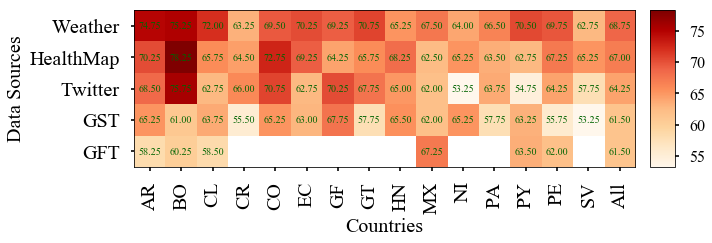

In [11]:
with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    
    divider = make_axes_locatable(ax)
    im = ax.imshow(used_table1.values, cmap=matplotlib.cm.OrRd, 
                   interpolation='none',)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    
    # yticks
    ax.set_yticks(pd.np.arange(0, used_table1.shape[0]))
    
    ax.set_yticklabels(used_table1.index, fontsize=fs)
    
    # xticks
    ax.set_xticks(pd.np.arange(0, used_table1.shape[1]))
    ax.set_xticklabels(table1.columns, fontsize=fs, rotation='vertical')
    
    # annotation
    for y in range(used_table1.shape[0]):
        for x in range(used_table1.shape[1]):
            val = used_table1.iloc[y, x]
            ax.text(x , y , value_to_annotate(val),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='darkgreen', fontsize=10)
    
    ax.set_xlabel('Countries', fontsize=fs)
    ax.set_ylabel('Data Sources', fontsize=fs)
    

    fig.colorbar(im, cax=cax)
    fig.tight_layout()
    fig.savefig('../figures/singleSource.png', dpi=600, bbox_inches='tight')

**Uncomment this to plot all methods.**
```python
with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(16,10))
    ax.grid(False)
    cax = ax.imshow(table1.values, cmap=matplotlib.cm.Reds, 
                    interpolation='none')
    ax.axhline(4.5, lw=4, color='k')
    ax.axhline(9.5, lw=4, color='k')
    
    # yticks
    ax.set_yticks(pd.np.arange(0, table1.shape[0], 5) + 2.25)
    ax.set_yticks(pd.np.arange(0, table1.shape[0]), minor=True)
    
    ax.set_yticklabels(table1.index.get_level_values(1), 
                       fontsize=20, minor=True)
    ax.set_yticklabels([ x + '\n\n\n' for x in table1.index.levels[0]],
                       rotation="vertical", fontsize=24)
    

    # xticks
    ax.set_xticks(pd.np.arange(0, table1.shape[1]))
    ax.set_xticklabels(table1.columns, fontsize=24, rotation='vertical')
    
    # annotation
    for y in range(table1.shape[0]):
        for x in range(table1.shape[1]):
            ax.text(x , y , '${:.2f}$'.format(table1.iloc[y, x]),
                     horizontalalignment='center',
                     verticalalignment='center',
                    color=fc
                    )
    ax.set_title('Single Source accuracy', fontsize=30)
    fig.colorbar(cax)
    fig.tight_layout()
    fig.savefig('singleSource.png')
```

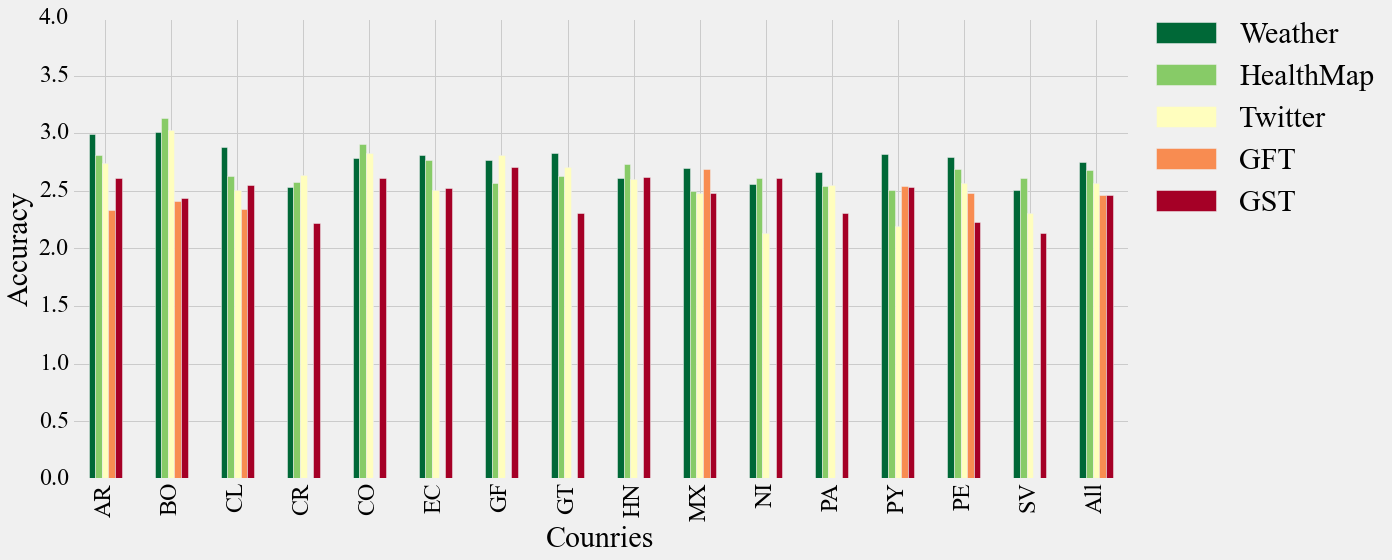

In [29]:
with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(16,8))
    
    used_table1.T.plot(kind='bar', ax=ax, legend=False, 
                       colormap=matplotlib.cm.RdYlGn_r)
    ax.legend(loc='best', 
              bbox_to_anchor=(1., 1.05),
              fontsize=30)
    
    # ax.set_title('Barplot: SingleSource', fontsize=30)
    ax.set_ylabel('Accuracy', fontsize=30)
    ax.set_xlabel('Counries', fontsize=30)
    ax.set_ylim([0, 4])
    
    ax.tick_params(axis='both', labelsize=24)
    
    fig.tight_layout()
    fig.savefig('./SingleSource_bar.png', bbox_inches='tight')

## Fusion

In [13]:
table2 = pd.read_csv('./table2.tex', sep=r'\s*&\s*', na_values=['N/A'], 
                    engine='python', skiprows=1, index_col=0)
used_table2 = table2 * 100 / 4.0

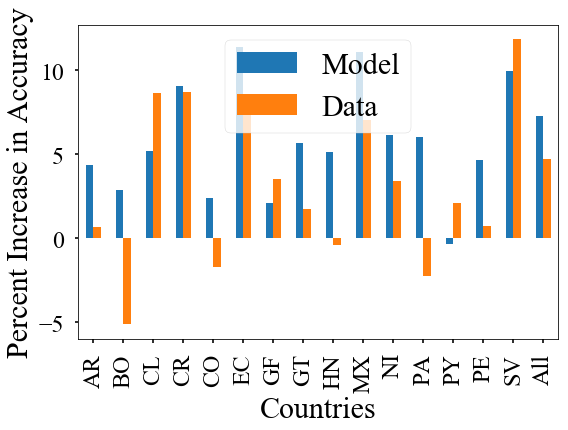

In [18]:
# Appending Single Source Best
singleMax = used_table1.max(axis=0)
singleMax.name = 'Single Source: Best'
saved_table2 = used_table2.append(singleMax)

# plotting table
plot_table2 = 100 * (used_table2 - singleMax) / singleMax

with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    plot_table2.T.plot(kind='bar', ax=ax, legend=False)
    ax.legend(loc='best', fontsize=30)
    ax.tick_params(axis='both', labelsize=24)
    
    ax.set_ylabel('Percent Increase in Accuracy', fontsize=30)
    ax.set_xlabel('Countries', fontsize=30)
    
    fig.tight_layout()
    fig.savefig('../figures/ModelVsData.png', dpi=600) #, bbox_inches='tight'


**TO plot full bars**
```python
with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(16,10))
    
    used_table2.T.plot(kind='bar', ax=ax, legend=False)
    ax.legend(loc='best', 
              #bbox_to_anchor=(1.15, 0.9),
             fontsize=30)
    # ax.set_title('Model vs Data Fusion', fontsize=30)
    ax.set_ylim([0, 100.0])
    
    ax.set_ylabel('Percent Accuracy', fontsize=30)
    ax.set_xlabel('Countries', fontsize=30)
    
    ax.tick_params(axis='both', labelsize=24)
    
    fig.tight_layout()
    fig.savefig('./ModelVsData.png', dpi=300) #, bbox_inches='tight'
```

## Ablation

In [19]:
table3 = pd.read_csv('./table3.tex', sep=r'\s*&\s*', na_values=['N/A'], 
                    engine='python', skiprows=1, index_col=0)

shift_table2 = ((table3.iloc[0, :].values - table3.iloc[1:, :]) 
                / table3.iloc[0, :].values) * 100
shift_table2

,AR,BO,CL,CR,CO,EC,GF,GT,HN,MX,NI,PA,PY,PE,SV,All
Sources,,,,,,,,,,,,,,,,
w/o Weather,9.345794,7.716049,9.180328,6.228374,11.824324,18.808777,7.317073,10.333333,13.840830,11.182109,5.415162,2.047782,15.584416,16.780822,7.291667,10.333333
w/o Healthmap,5.295950,12.037037,5.245902,11.418685,5.067568,13.166144,9.059233,8.333333,4.844291,9.904153,7.220217,6.143345,18.506494,1.712329,5.902778,8.333333
w/o Twitter,9.034268,3.086420,3.278689,9.688581,8.108108,11.912226,-0.348432,7.000000,9.688581,6.389776,1.083032,10.238908,9.415584,6.164384,2.430556,6.666667
w/o GST,0.623053,4.012346,4.262295,8.650519,9.121622,15.360502,-0.696864,4.000000,3.806228,1.916933,0.722022,0.682594,9.090909,7.191781,0.694444,4.666667
w/o GFT,0.311526,3.703704,5.573770,0.000000,0.000000,0.000000,0.000000,0.000000,2.076125,3.514377,0.000000,0.000000,3.246753,1.369863,0.000000,1.333333


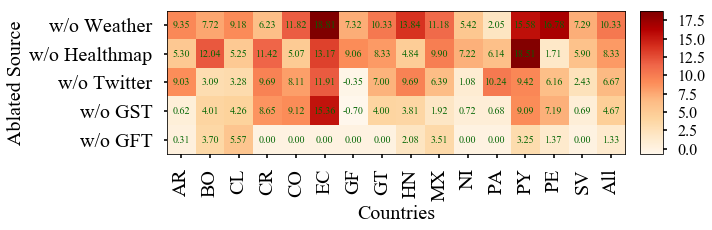

In [22]:
with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    im = ax.imshow(shift_table2.values, cmap=matplotlib.cm.OrRd, 
                   interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    
    # yticks
    ax.set_yticks(pd.np.arange(0, shift_table2.shape[0]))
    ax.set_yticklabels(shift_table2.index, fontsize=fs)
    
     # xticks
    ax.set_xticks(pd.np.arange(0, table1.shape[1]))
    ax.set_xticklabels(table1.columns, fontsize=fs, rotation='vertical')
    
    # annotation
    for y in range(shift_table2.shape[0]):
        for x in range(shift_table2.shape[1]):
            val = shift_table2.iloc[y, x]
            ax.text(x , y , value_to_annotate(val),
                     horizontalalignment='center',
                     verticalalignment='center',
                    color='darkgreen', fontsize=10
                    )
    fig.colorbar(im, cax=cax)
    
    ax.set_ylabel('Ablated Source', fontsize=fs)
    ax.set_xlabel('Countries', fontsize=fs)
    
    fig.tight_layout()
    
    fig.savefig('../figures/Ablation.png', bbox_inches='tight', dpi=600)

# Correction

In [23]:
table4 = pd.read_csv('./table4.tex', sep=r'\s*&\s*', na_values=['N/A'], 
                    engine='python', skiprows=1, index_col=0)
selected_table4 = table4.ix[['None', 'Combined'], :].T
selected_table4 = selected_table4 / 4.0 * 100
selected_table4

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Correction Method,None,Combined
AR,78.00,80.25
BO,80.50,81.00
CL,75.75,76.25
CR,72.00,72.25
CO,74.50,74.00
EC,78.25,79.75
GF,71.75,71.75
GT,74.75,75.00
HN,71.75,72.25
MX,75.00,78.25


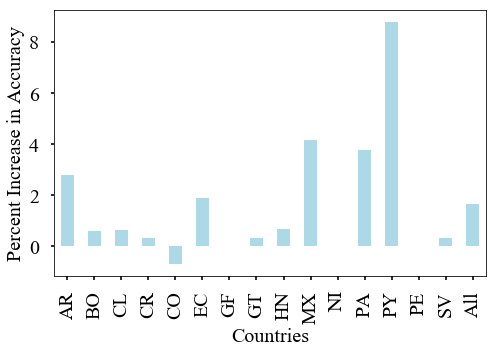

In [28]:
plot_table4 = ((selected_table4['Combined']  - selected_table4['None']) 
               / selected_table4['Combined']) * 100 
with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(7, 5))
    
    plot_table4.plot(kind='bar', ax=ax, legend=False, color='lightblue')
    ax.set_ylabel('Percent Increase in Accuracy', fontsize=fs)
    ax.set_xlabel('Countries', fontsize=fs)
    
    ax.tick_params(axis='both', labelsize=fs)
    
    
    fig.tight_layout()
    fig.savefig('../figures/PahoCorrection.png', dpi=600)
    

**to plot absolute values**
```python
with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(16,10))
    
    selected_table4.plot(kind='bar', ax=ax, legend=False)
    ax.legend(['w/o Correction', 'w/ Correction'], 
               loc='best', 
              # bbox_to_anchor=(1.0, 0.9),
             fontsize=30)
    
    ax.set_ylim([0, 100.0])
    
    ax.set_ylabel('Percent Accuracy', fontsize=30)
    ax.set_xlabel('Countries', fontsize=30)
    
    ax.tick_params(axis='both', labelsize=24)
    
    
    fig.tight_layout()
    fig.savefig('./PahoCorrection.png', dpi=300) # ,bbox_inches='tight'
```

# FLu Segregation

In [10]:
table5 = pd.read_csv('./table5.tsv', delimiter='\t')

table5.set_index('Segregation Level', inplace=True)
plot_table5 = table5 
plot_table5

,By strains,By Age
Segregation Level,,
National,1.084011,-0.271003
Region 1,1.617251,0.269542
Region 2,0.268817,0.806452
Region 3,0.561798,-3.370787
Region 4,0.271739,0.271739
Region 5,0.547945,-0.273973
Region 6,1.912568,1.366120
Region 7,0.283286,-0.566572
Region 8,-0.280112,0.280112


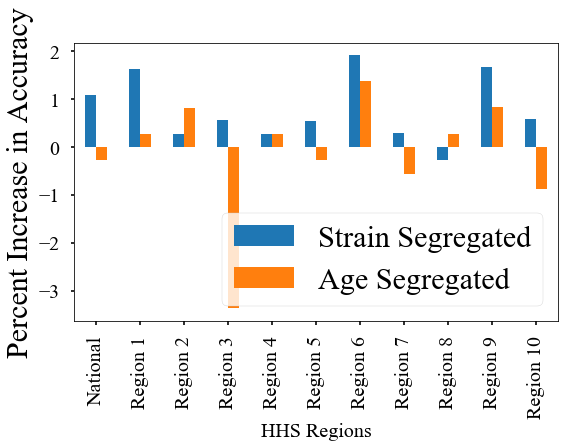

In [15]:
with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(8,6))
    
    plot_table5.plot(kind='bar', ax=ax, legend=False)
    ax.legend(['Strain Segregated', 'Age Segregated'],
              loc='lower right', 
              #bbox_to_anchor=(0.7, 0.9),
             fontsize=30)
    #ax.set_ylim([-4, 4])
    ax.set_ylabel('Percent Increase in Accuracy', fontsize=30)
    ax.set_xlabel('HHS Regions', fontsize=fs)
    
    ax.tick_params(axis='both', labelsize=fs)
    fig.tight_layout()
    fig.savefig('../figures/FluSegregation.png', dpi=600, bbox_inches='tight')

**to plot absolute value**
```python
with plt.style.context((style)):
    fig, ax = plt.subplots(figsize=(16,10))
    
    used_table5.plot(kind='bar', ax=ax, legend=False)
    ax.legend(['Unsegregated', 'Strain Segregated', 'Age Segregated'],
              loc='best', 
              bbox_to_anchor=(0.7, 0.9),
             fontsize=30)
    
    ax.set_ylim([0, 100.0])
    
    ax.set_ylabel('Percent Accuracy', fontsize=30)
    ax.set_xlabel('HHS Regions', fontsize=30)
    
    ax.tick_params(axis='both', labelsize=24)
    
    
    fig.tight_layout()
    fig.savefig('./FluSegregation.png', dpi=300, bbox_inches='tight')
```